In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim #Hacer animaciones
from mpl_toolkits import mplot3d #Hacer plots en 3D
import matplotlib.cm as cm #Colorcitos uwu

In [2]:
#Clase partícula
class Particle():
    
    #Constructor de la clase
    def __init__(self, r0, v0, a0, t, m, radius, Id):
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
       
    #Llenando las posiciones
    def SetPosition(self,i,r):
        self.rVector[i] = r
    
    #Llenando las velocidades
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    #Llenando las aceleraciones
    def SetAceleration(self,i,a):
        self.aVector[i] = a
    
    #Método
    def Evolution(self,i):
        
        #Setteando las poisiciones y velocidades
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
        #Método de Euler
        self.r += self.dt * self.v
        self.v += self.dt * self.a

      
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    
    #¿Qué pasa si choca?
    def CheckWallLimits(self,limits,dim=3):
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
                
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
                
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                

In [3]:
#Obtener las partículas
def GetParticles(NParticles, Limits, Velo, Dim = 3, dt=0.01):
    
    Particles_ = [ ]
    
    for i in range(NParticles):
        
        r0 = np.random.uniform(-Limits + 1.0, Limits-1.0, size = Dim) #Distribución aleatoria con una tolerancia.
        v0 = np.random.uniform(-Velo, Velo, size = Dim) #Distribución aleatoria con una tolerancia.
        a0 = np.zeros(Dim)
        
        p = Particle(r0, v0, a0, t, 1.0, 2.0, i)
        
        Particles_.append(p)
    
    return Particles_

In [4]:
#Correr la simulación
def RunSimulation(t, NParticles, Velo):
    
    Particles = GetParticles(NParticles, Limits[0], Velo = Velo, dt = dt)
    
    for it in tqdm(range(len(t))): #Evolución temporal que define la simulación en un tiempo t
        for i in range(len(Particles)):
            
            Particles[i].Evolution(it)
            Particles[i].CheckWallLimits(Limits)
            
    return Particles

In [5]:
#Reducir el tiempo
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [8]:
#Definición de los atributos

dt = 0.01 #Paso temporal
tmax= 10 #Tiempo máximo
t = np.arange(0, tmax+dt, dt) #Array de tiempos

Limits = np.array([10, 10, 10]) #Límites de la caja

#Creamos las partículas
Particles = RunSimulation(t, 100, Velo = 10)

redt = ReduceTime(t,10) #Reducción del tiempo

100%|██████████| 1001/1001 [00:02<00:00, 458.23it/s]


<IPython.core.display.Javascript object>


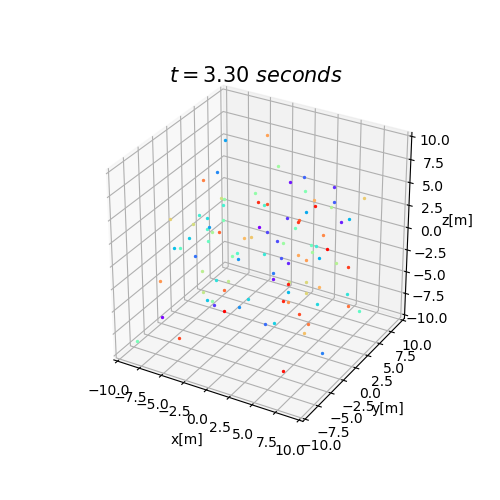

In [9]:
#Aquí hacemos la animación
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection = '3d')

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[2],Limits[2])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    colors = cm.rainbow(np.linspace(0,1, len(Particles)))
    
    for p, c in zip(Particles, colors):
        x = p.GetPositionVector()[i,0]
        y = p.GetPositionVector()[i,1]
        z_ = p.GetPositionVector()[i,2]
        
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        vz = p.GetVelocityVector()[i,2]
        
        
        plot = ax.scatter3D(x,y,z_, s = p.GetR(), color = c)
        ax.set_xlabel("x[m]")
        ax.set_ylabel("y[m]")
        ax.set_zlabel("z[m]")
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [10]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('FallingBall2.mp4', writer=writer_)